Khai báo thư viện

In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [51]:
# Đọc file 
train_data = pd.read_csv('data/train/data_train1.csv')
test_data = pd.read_csv('data/train/data_test1.csv')


In [52]:
# Separate target from predictors
y_train = train_data["Giá"]
X_train = train_data.drop(['Giá'], axis=1)
y_test = test_data['Giá']
X_test = test_data.drop(['Giá'], axis=1)

In [53]:
X_train.shape

(20776, 17)

Thực hiện mã hóa một lần cho tất cả các tính năng phân loại 

In [54]:
# Identify categorical columns
categorical_cols = [col_name for col_name in X_train.columns if X_train[col_name].dtype in ['object']]

In [55]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
OH_X_train = OH_encoder.fit_transform(X_train[categorical_cols])
OH_X_test = OH_encoder.transform(X_test[categorical_cols])

In [56]:
OH_X_train.shape

(20776, 1575)

In [57]:
# One-hot encoding removed index; put it back
OH_X_train.index = X_train.index
OH_X_test.index = X_test.index

In [58]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_cols, axis=1)
num_X_test = X_test.drop(categorical_cols, axis=1)

In [59]:
# Chuyển đổi ma trận CSR thành DataFrame
OH_X_train_df = pd.DataFrame.sparse.from_spmatrix(OH_X_train)
OH_X_test_df = pd.DataFrame.sparse.from_spmatrix(OH_X_test)

# Kết hợp dữ liệu
X_train_concat = pd.concat([num_X_train, OH_X_train_df], axis=1)
X_test_concat = pd.concat([num_X_test, OH_X_test_df], axis=1)


In [60]:
# Chuyển đổi ma trận CSR thành DataFrame
OH_X_train_df = pd.DataFrame.sparse.from_spmatrix(OH_X_train)
OH_X_test_df = pd.DataFrame.sparse.from_spmatrix(OH_X_test)

# Kết hợp dữ liệu
X_train_concat = pd.concat([num_X_train, OH_X_train_df], axis=1)
X_test_concat = pd.concat([num_X_test, OH_X_test_df], axis=1)


## Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the transformed and encoded data
# Please note that you need to convert your target variable to binary format if it's not already done
logistic_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = logistic_model.predict(OH_X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.15594917212167886
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 0]]
               precision    recall  f1-score   support

   40000000.0       0.00      0.00      0.00         1
   59000000.0       0.00      0.00      0.00         0
   60000000.0       0.00      0.00      0.00         1
   68000000.0       0.00      0.00      0.00         1
   75000000.0       0.00      0.00      0.00         1
   80000000.0       0.00      0.00      0.00         2
   95000000.0       0.00      0.00      0.00         1
   98000000.0       0.00      0.00      0.00         1
   99000000.0       0.00      0.00      0.00         2
  109000000.0       0.00      0.00      0.00         1
  110000000.0       0.00      0.00      0.00         3
  111000000.0       0.00      0.00      0.00         1
  115000000.0       0.00      0.00      0.00         4
  116000000.0       0.00      0.00      0.00         1
  117000000.0       0.00

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.loca

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

Accuracy: 0.15594917212167886
Precision: 0.1348739571592261
Recall: 0.15594917212167886
F1 Score: 0.1293293541646175


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Support vector machine

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Support Vector Regression model
svm_model = SVR(kernel='linear')

# Train the model on the transformed and encoded data
svm_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = svm_model.predict(OH_X_test)

# Calculate the MSE, R^2, and MAE metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 3.0655454777511127e+18
R^2: -0.11382233446543433
Mean Absolute Error: 784223528.1915672


## Multiple Linear Regression 

In [64]:
# Train the model
model = LinearRegression()
model.fit(OH_X_train, y_train)

# Make predictions
y_pred = model.predict(OH_X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 1.503934582817701e+17
Mean Absolute Error: 155980230.9790712
R^2 Score: 0.9453566766477666


### Đánh giá....

#### visulaization 

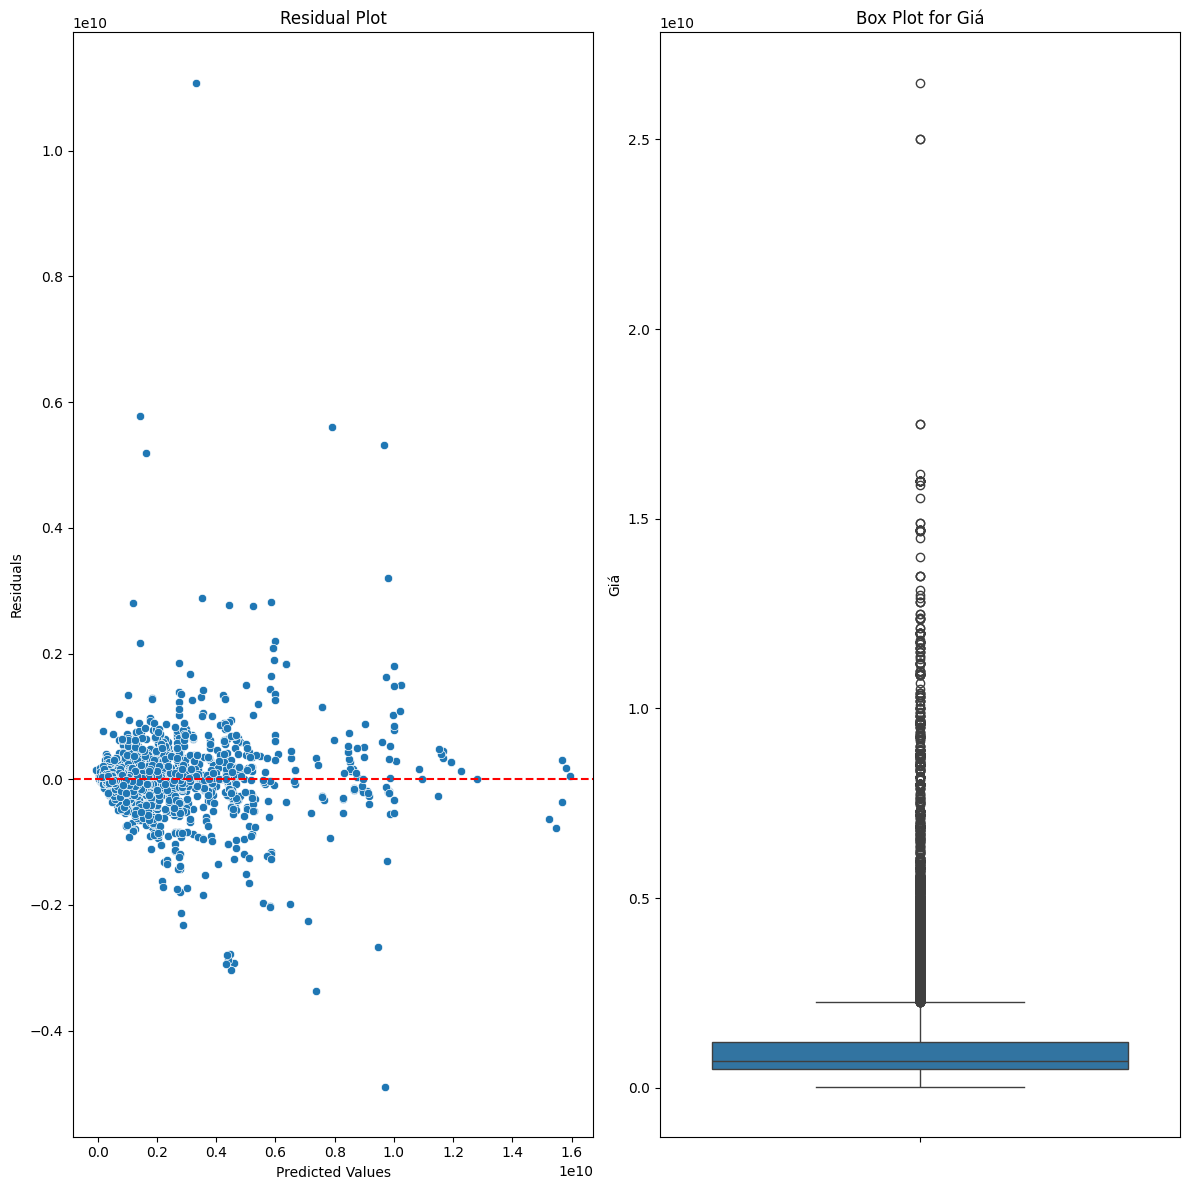

In [65]:
# Create a 1x2 subplot grid
plt.figure(figsize=(12, 12))

# Subplot 1: Residual Plot
plt.subplot(1, 2, 1)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Subplot 2: Box Plot for y_train
plt.subplot(1, 2, 2)
sns.boxplot(y=y_train)
plt.title('Box Plot for Giá')
plt.ylabel('Giá')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined Giá
plt.show()


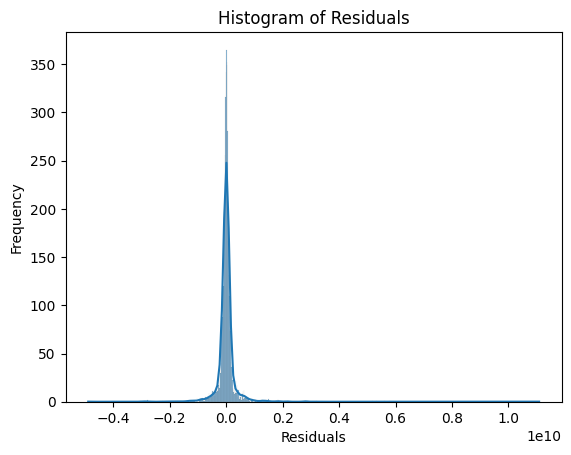

In [66]:
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Kết luận....

## KNN

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Standardize the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(OH_X_train)
X_test_scaled = scaler.transform(OH_X_test)

# Apply PCA with arpack solver
pca = PCA(n_components=10, svd_solver='arpack')  # Specify the solver and choose a fixed number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Transform the target variable (log transformation)
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Lists to store results
k_values = list(range(2, 9))
mse_values = []
r2_values = []
mae_values = []

for k in k_values:
    # Initialize the KNN regressor with the current k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Train the KNN model on the reduced data
    knn_regressor.fit(X_train_pca, y_train_transformed)

    # Make predictions on the reduced test data
    y_pred_transformed = knn_regressor.predict(X_test_pca)

    # Reverse the transformation of the target variable
    y_pred = np.expm1(y_pred_transformed)

    # Calculate MSE, R^2, and MAE for the current k value
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    mse_values.append(mse)
    r2_values.append(r2)
    mae_values.append(mae)

# Results
k_best_mse = k_values[np.argmin(mse_values)]
k_best_r2 = k_values[np.argmax(r2_values)]
k_best_mae = k_values[np.argmin(mae_values)]


In [68]:
mse_values, r2_values, mae_values

([4.752444856203484e+17,
  4.7887978461911597e+17,
  5.081578754358882e+17,
  5.339144778214919e+17,
  5.554942599574301e+17,
  5.7404507025749357e+17,
  5.974666137255822e+17],
 [0.8273266776639687,
  0.826005843493778,
  0.8153680657478901,
  0.8060097707216891,
  0.7981690639077295,
  0.791428890915809,
  0.782919006325368],
 [196394109.83155578,
  207499175.93006477,
  219020912.23009357,
  228567568.35944587,
  236025009.5494813,
  243082310.9620464,
  250725050.8609515])

In [69]:
print("Best k:", k_best_mae)

Best k: 2


### Giải thích

### Tổng quan

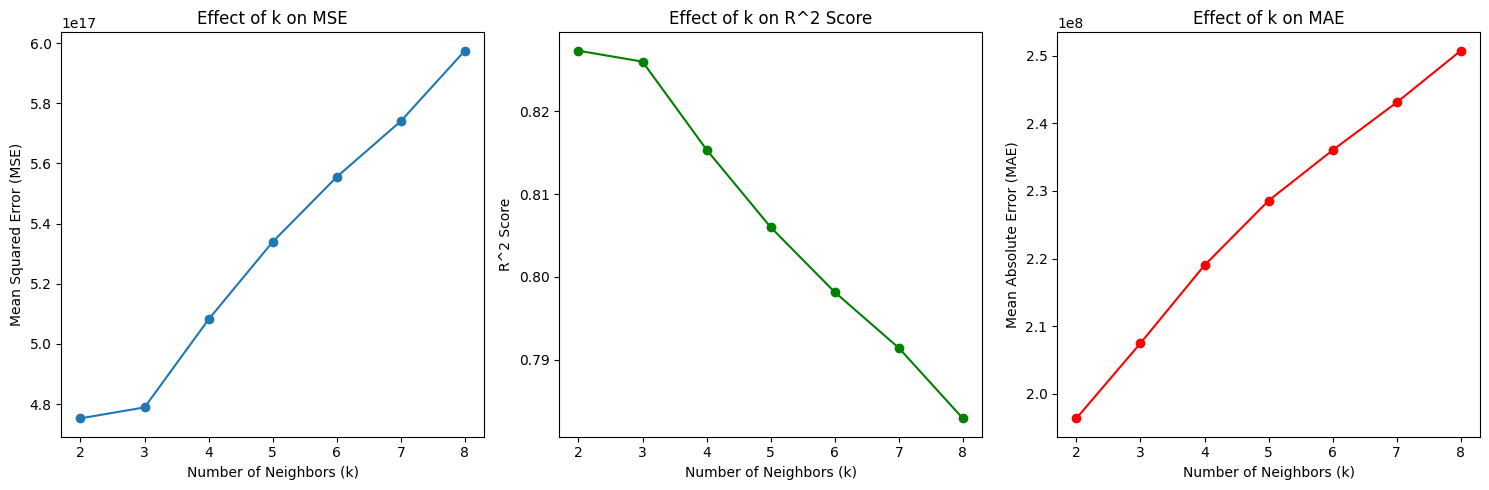

In [70]:
# Create a plot to visualize the effect of k on MSE, R^2, and MAE
plt.figure(figsize=(15, 5))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of k on MSE')

# Plot R^2
plt.subplot(1, 3, 2)
plt.plot(k_values, r2_values, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.title('Effect of k on R^2 Score')

# Plot MAE
plt.subplot(1, 3, 3)
plt.plot(k_values, mae_values, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Effect of k on MAE')

plt.tight_layout()
plt.show()

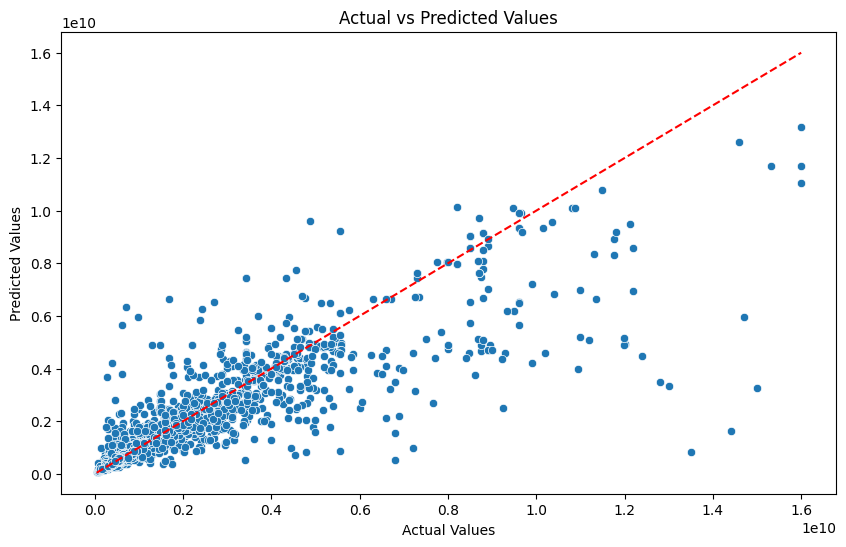

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Decision Tree

In [72]:
# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the transformed and encoded data
dt_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = dt_model.predict(OH_X_test)

# Calculate the MSE, R^2, and MAE metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 1.9857305646255677e+17
Mean Absolute Error: 114336960.62018885
R^2 Score: 0.9278513051212942


### Giải thích

### Visualization

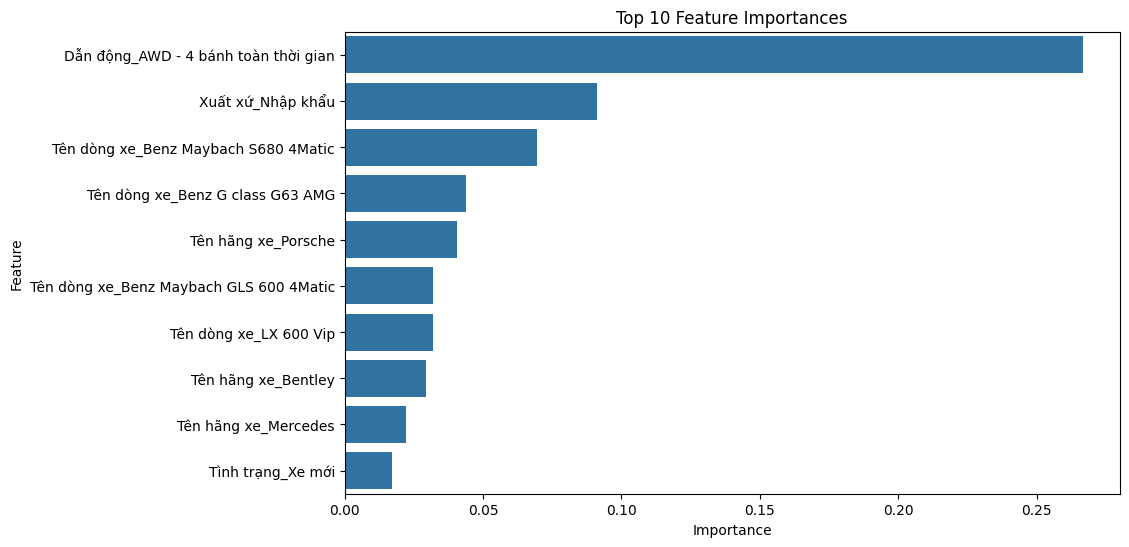

In [73]:
feature_importances = dt_model.feature_importances_
feature_names = OH_encoder.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

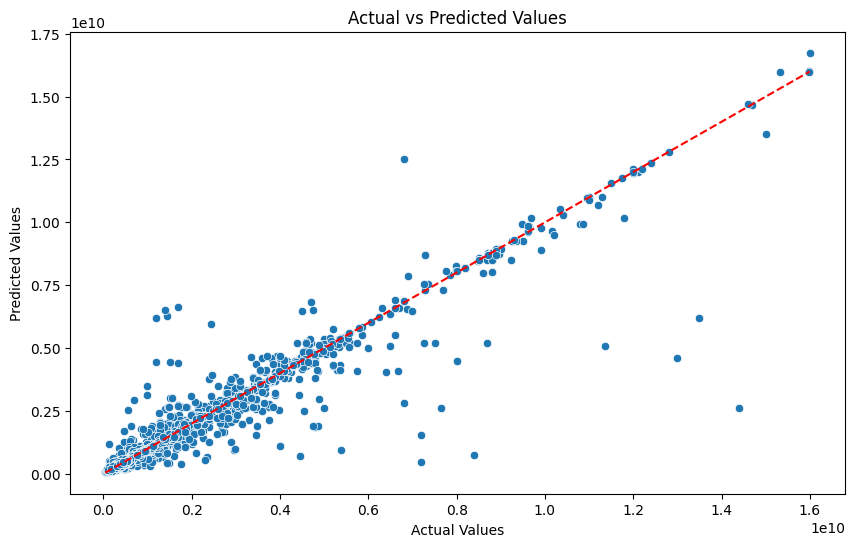

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Tổng kết

## Gradient Boosting Regression

In [75]:
# Initialize the Gradient Boosting Regressor model
gbdt_model = GradientBoostingRegressor(random_state=42)

# Train the model on the transformed and encoded data
gbdt_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = gbdt_model.predict(OH_X_test)

# Calculate the MSE, R^2, and MAE metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 5.2809058371538835e+17
R^2: 0.8081257997860168
Mean Absolute Error: 406266021.8830884


### Giải thích

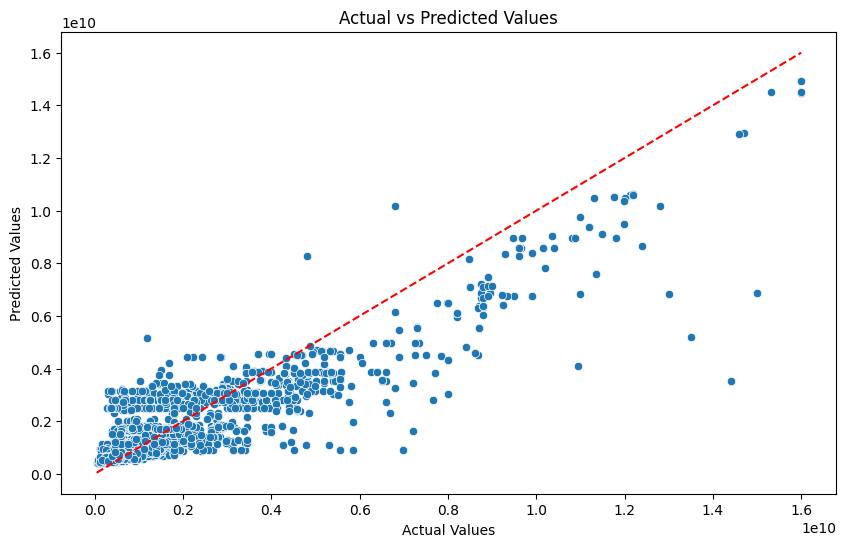

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Bagging

In [79]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Bagging Regressor model
bagging_model = BaggingRegressor(random_state=42)

# Train the model on the transformed and encoded data
bagging_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = bagging_model.predict(OH_X_test)

# Calculate the MSE, R^2, and MAE metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 1.791676715131149e+17
R^2: 0.9349019756536537
Mean Absolute Error: 116832606.78341869


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train each model and calculate its R^2 score
for model_name, model in models.items():
    model.fit(OH_X_train, y_train)
    y_pred = model.predict(OH_X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R^2 Score: {r2}")


Linear Regression R^2 Score: 0.9453566766477666
Decision Tree R^2 Score: 0.9278513051212942
Random Forest R^2 Score: 0.9361769402364793
Gradient Boosting R^2 Score: 0.8081257997860168


In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Add the new models to the dictionary
models.update({
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "Multiple Linear Regression": LinearRegression()
})

# Train each model and calculate its R^2 score
for model_name, model in models.items():
    model.fit(OH_X_train, y_train)
    y_pred = model.predict(OH_X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R^2 Score: {r2}")


Linear Regression R^2 Score: 0.9453566766477666
Decision Tree R^2 Score: 0.9278513051212942
Random Forest R^2 Score: 0.9361769402364793
Gradient Boosting R^2 Score: 0.8081257997860168
K-Nearest Neighbors R^2 Score: 0.8806484445784383
Support Vector Machine R^2 Score: -0.11382674069677168
Multiple Linear Regression R^2 Score: 0.9453566766477666
